In [12]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image
import numpy as np
import re

from textblob import TextBlob

import sys
import matplotlib.pyplot as plt
import pandas as pd

import nltk
import pycountry
from nltk.stem import SnowballStemmer

from langdetect import detect

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer


In [13]:
# Request for foursquare and checking status code   
url = 'https://www.trustpilot.com/review/flixbus.com?languages=all&page='
response = requests.get(url)
response.status_code

200

In [14]:
#Connecting with Beautiful Soap for bacchanal buffet
page = response.text
soup = BeautifulSoup(page, "lxml")
#soup=BeautifulSoup(response.content, 'html.parser')
soup.prettify()
# rows = soup.find_all('div', {'class': 'review-content_body'})
# print(rows)

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <script charset="UTF-8" data-domain-script="84cb5c09-05e4-488b-b71c-2fe171dca5e5" data-language="en-US" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="application/javascript">\n  </script>\n  <script>\n   function OptanonWrapper() {\n            var event = new CustomEvent("OptanonWrapper");\n            document.dispatchEvent(event);\n        }\n  </script>\n  <link crossorigin="" href="https://googleads.g.doubleclick.net/" rel="preconnect"/>\n  <link crossorigin="" href="https://www.googleadservices.com/" rel="preconnect"/>\n  <link crossorigin="" href="https://www.googletagmanager.com/" rel="preconnect"/>\n  <link crossorigin="" href="https://cdn.trustpilot.net/" rel="preconnect"/>\n  <link crossorigin="" href="https://api.amplitude.com/" rel="preconnect"/>\n  <link crossorigin="" href="//user-images.trustpilot.com/" rel="preconnect"/>\n  <link crossorigin="" href="https://consumer-assets.trustpilot.com" rel="preconn

In [16]:
review_list = []

i = 1
while i < 5:
    url_list = "https://www.trustpilot.com/review/tmobile.com?languages=all&page="+str(i)
    #print(url_list)
    response = requests.get(url_list)
    #print(response.status_code)
    page = response.text
    #print(page)
    soup = BeautifulSoup(page,"lxml")
    #print(soup.prettify)
    #row=soup.find_all('p')
    rows = soup.find_all('div', {'class': 'review-content'})
    #rows=soup.find_all('tr')
    print(rows)
    for row in rows:
        cells = row.find_all('p')
        #print(cells)
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        #print(cells_sub)
        review_list.append(cells_sub)
    result = pd.DataFrame(review_list)
    i += 1

[<div class="review-content">
<div class="review-content__header" v-pre="">
<div class="review-content-header">
<div class="star-rating star-rating--medium">
<img alt="2 stars: Poor" src="https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-2.svg"/>
</div>
<div class="review-content-header__dates">
<script data-initial-state="review-dates" type="application/json">
{"publishedDate":"2020-12-11T23:09:27Z","updatedDate":null,"reportedDate":null}
</script>
<review-dates :published-date="publishedDate" :reported-date="reportedDate" :updated-date="updatedDate"></review-dates>
</div>
<div class="review-content-header__review-labels">
</div>
</div>
</div>
<div class="review-content__body" v-pre="">
<h2 class="review-content__title">
<a class="link link--large link--dark" data-track-link="{'target': 'Single review', 'name': 'review-title'}" href="/reviews/5fd3fc27755dc107e0c035cc">
                        I cannot recommend tmobile
                </a>
</h2>
<p class="review-content__text"

[<div class="review-content">
<div class="review-content__header" v-pre="">
<div class="review-content-header">
<div class="star-rating star-rating--medium">
<img alt="1 star: Bad" src="https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-1.svg"/>
</div>
<div class="review-content-header__dates">
<script data-initial-state="review-dates" type="application/json">
{"publishedDate":"2020-08-26T21:36:05Z","updatedDate":null,"reportedDate":null}
</script>
<review-dates :published-date="publishedDate" :reported-date="reportedDate" :updated-date="updatedDate"></review-dates>
</div>
<div class="review-content-header__review-labels">
</div>
</div>
</div>
<div class="review-content__body" v-pre="">
<h2 class="review-content__title">
<a class="link link--large link--dark" data-track-link="{'target': 'Single review', 'name': 'review-title'}" href="/reviews/5f46d5c502e85708c8d9a2b7">
                        they lie to get you to switch to them…
                </a>
</h2>
<p class="review-cont

[<div class="review-content">
<div class="review-content__header" v-pre="">
<div class="review-content-header">
<div class="star-rating star-rating--medium">
<img alt="1 star: Bad" src="https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-1.svg"/>
</div>
<div class="review-content-header__dates">
<script data-initial-state="review-dates" type="application/json">
{"publishedDate":"2020-03-27T10:37:49Z","updatedDate":null,"reportedDate":null}
</script>
<review-dates :published-date="publishedDate" :reported-date="reportedDate" :updated-date="updatedDate"></review-dates>
</div>
<div class="review-content-header__review-labels">
</div>
</div>
</div>
<div class="review-content__body" v-pre="">
<h2 class="review-content__title">
<a class="link link--large link--dark" data-track-link="{'target': 'Single review', 'name': 'review-title'}" href="/reviews/5e7dd77d3c93ae06dc6a9e3d">
                        Tmobile just turned off my phone with…
                </a>
</h2>
<p class="review-cont

[<div class="review-content">
<div class="review-content__header" v-pre="">
<div class="review-content-header">
<div class="star-rating star-rating--medium">
<img alt="4 stars: Great" src="https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-4.svg"/>
</div>
<div class="review-content-header__dates">
<script data-initial-state="review-dates" type="application/json">
{"publishedDate":"2019-07-28T18:18:50Z","updatedDate":null,"reportedDate":null}
</script>
<review-dates :published-date="publishedDate" :reported-date="reportedDate" :updated-date="updatedDate"></review-dates>
</div>
<div class="review-content-header__review-labels">
</div>
</div>
</div>
<div class="review-content__body" v-pre="">
<h2 class="review-content__title">
<a class="link link--large link--dark" data-track-link="{'target': 'Single review', 'name': 'review-title'}" href="/reviews/5d3de70af018690bd044f41b">
                        I like Tuesday deals!
                </a>
</h2>
</div>
</div>, <div class="review-c

In [52]:
# todos=[]

# for element in soup.find_all('h2'):
#     todos.append(element.text)
    
# print(todos)

# todos=[element.text for element in soup.find_all('img')]
        
# todos
review_list = []

i = 1
while i < 5:
    url_list = "https://www.trustpilot.com/review/tmobile.com?languages=all&page="+str(i)
    #print(url_list)
    response = requests.get(url_list)
    #print(response.status_code)
    page = response.text
    #print(page)
    soup = BeautifulSoup(page,"lxml")
    #print(soup.prettify)
    #row=soup.find_all('p')
    rows = soup.find_all('div', {'class': 'star-rating'})
    #rows=soup.find_all('tr')
    #print(rows)
    for row in rows:
        cells = row.find_all('p')
        #print(cells)
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        #print(cells_sub)
        review_list.append(cells_sub)
    result = pd.DataFrame(review_list)
    i += 1
result

,0
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
83,[]
84,[]
85,[]
86,[]


In [18]:
result

,0
0,[\n I cannot recommend tmobile....
1,[\n You're the best Telco ever ...
2,[\n T-Mobile has always treated...
3,[\n I have been with T Mobile f...
4,[\n Their coverage map is not e...
...,...
75,[\n Paid $650.00 for the new On...
76,[\n Worst company ever! They sh...
77,[\n T-mobile robbed me to the t...
78,"[\n Always a great Experience, ..."


In [270]:
len(result)

80

In [271]:
result.head(10)

,0
0,[\n I have been with T Mobile f...
1,[\n Their coverage map is not e...
2,[\n I have used prepaid service...
3,[\n Don't believe the pink maps...
4,[\n There free trial hotspot su...
5,[\n I hate this company. Been w...
6,[\n Love them! Customer service...
7,[\n They don’t have a wide rang...
8,[\n I use tmobile for a long ti...
9,"[\n Leah, the manager at T-Mobi..."


In [272]:
# Split each row to cells with ","

result_split1 = result[0].str.split('[',expand=True)
result_split2 = result_split1[1].str.split(']',expand=True)
result_split3 = result_split2[0]
result = pd.DataFrame(result_split3)

In [273]:
reviewlist = pd.DataFrame(result)

In [274]:
reviewlist

,0
0,\n I have been with T Mobile fo...
1,\n Their coverage map is not en...
2,\n I have used prepaid service ...
3,\n Don't believe the pink maps....
4,\n There free trial hotspot suc...
...,...
75,"\n Always a great Experience, C..."
76,\n Tmobile one-plus is the best...
77,\n Always get great cell signal...
78,\n better phone service than mo...


In [275]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
new_line = lambda x: re.sub('\n',' ',x)

reviewlist['text'] = reviewlist[0].map(alphanumeric).map(punc_lower).map(new_line)
reviewlist.head()

,0,text
0,\n I have been with T Mobile fo...,i have been with t mobile for...
1,\n Their coverage map is not en...,their coverage map is not ent...
2,\n I have used prepaid service ...,i have used prepaid service t...
3,\n Don't believe the pink maps....,don t believe the pink maps ...
4,\n There free trial hotspot suc...,there free trial hotspot suck...


In [276]:
#reviewlist = reviewlist["text"]
reviewlist = pd.DataFrame(reviewlist)

In [277]:
reviewlist[['polarity', 'subjectivity']] = reviewlist['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [278]:
reviewlist

,0,text,polarity,subjectivity
0,\n I have been with T Mobile fo...,i have been with t mobile for...,0.029318,0.471061
1,\n Their coverage map is not en...,their coverage map is not ent...,0.122500,0.603333
2,\n I have used prepaid service ...,i have used prepaid service t...,0.032788,0.345578
3,\n Don't believe the pink maps....,don t believe the pink maps ...,-0.069244,0.532746
4,\n There free trial hotspot suc...,there free trial hotspot suck...,-0.072500,0.655000
...,...,...,...,...
75,"\n Always a great Experience, C...",always a great experience cu...,0.800000,0.750000
76,\n Tmobile one-plus is the best...,tmobile one plus is the best ...,0.433333,0.508333
77,\n Always get great cell signal...,always get great cell signal ...,0.900000,0.525000
78,\n better phone service than mo...,better phone service than mos...,0.200000,0.640000


In [279]:
for index, row in reviewlist['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        reviewlist.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        reviewlist.loc[index, 'sentiment'] = "positive"
    else:
        reviewlist.loc[index, 'sentiment'] = "neutral"
    reviewlist.loc[index, 'neg'] = neg
    reviewlist.loc[index, 'neu'] = neu
    reviewlist.loc[index, 'pos'] = pos
    reviewlist.loc[index, 'compound'] = comp

In [280]:
reviews = reviewlist[reviewlist["compound"]!=0]

In [281]:
reviews.sort_values("pos", ascending=False).sample(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
52,\n Love this company. When i ca...,love this company when i cal...,0.186580,0.408983,positive,0.112,0.773,0.115,0.2960
68,\n Recently switched over to T-...,recently switched over to t m...,-0.083523,0.336111,negative,0.057,0.891,0.052,-0.0772
59,\n I was a faithful customer of...,i was a faithful customer of ...,-0.145455,0.474134,negative,0.137,0.829,0.034,-0.9629
2,\n I have used prepaid service ...,i have used prepaid service t...,0.032788,0.345578,negative,0.068,0.883,0.049,-0.6546
56,\n T-Mobile is nothing but crap...,t mobile is nothing but crap ...,-0.219048,0.355952,positive,0.058,0.860,0.082,0.0263


In [282]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [283]:
count_values_in_column(reviews,"sentiment")

,Total,Percentage
positive,41,53.95
negative,35,46.05


In [284]:
reviews.sort_values("neg", ascending=False).head(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
69,\n WORST CUSTOMER SERVICE EVER....,worst customer service ever ...,-1.000000,1.000000,negative,0.384,0.616,0.000,-0.9201
58,\n Bad reception all over the w...,bad reception all over the wo...,-0.700000,0.666667,negative,0.368,0.632,0.000,-0.5423
29,\n Website is the worst. Ridicu...,website is the worst ridicul...,-0.527778,1.000000,negative,0.320,0.680,0.000,-0.7650
15,\n Phone was stolen. I'm disabl...,phone was stolen i m disable...,-0.250000,0.100000,negative,0.317,0.579,0.104,-0.6705
60,\n Tmobile is scam company. The...,tmobile is scam company they...,-0.482407,0.610185,negative,0.315,0.566,0.119,-0.8074


In [285]:
reviews.sort_values("pos", ascending=False).head(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
61,"\n great service , great packag...",great service great package...,0.80000,0.750,positive,0.0,0.272,0.728,0.8934
12,\n Overall good experience. Def...,overall good experience defi...,0.27500,0.275,positive,0.0,0.362,0.638,0.8316
77,\n Always get great cell signal...,always get great cell signal ...,0.90000,0.525,positive,0.0,0.420,0.580,0.8519
6,\n Love them! Customer service ...,love them customer service h...,0.21875,0.675,positive,0.0,0.455,0.545,0.8955
44,\n Customer service is great! ...,customer service is great s...,0.65000,0.875,positive,0.0,0.504,0.496,0.7845


In [286]:
reviews.mean()

polarity        0.046127
subjectivity    0.551283
neg             0.102711
neu             0.740211
pos             0.156987
compound        0.034599
dtype: float64

In [287]:
reviews.groupby("sentiment").mean()

,polarity,subjectivity,neg,neu,pos,compound
sentiment,,,,,,
negative,-0.189028,0.551164,0.164543,0.778829,0.056543,-0.711834
positive,0.246869,0.551386,0.049927,0.707244,0.242732,0.671798


In [288]:
reviews.sentiment.value_counts(normalize=False)

positive    41
negative    35
Name: sentiment, dtype: int64

In [289]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


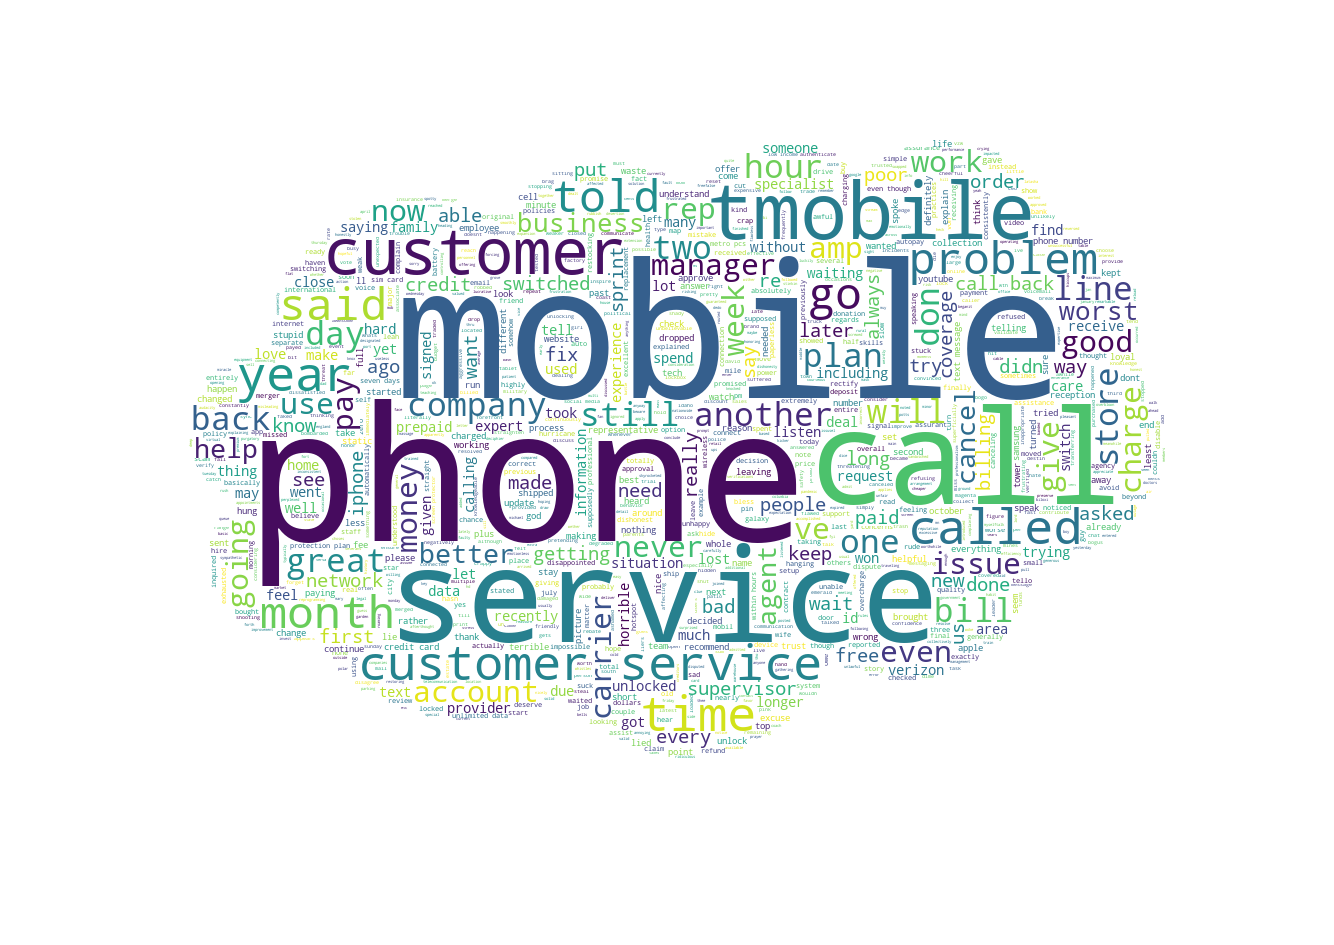

In [290]:
create_wordcloud(reviews["text"].values)

In [291]:
negative_values = reviews[reviews["sentiment"]=="negative"]
negative_values = negative_values["text"].values

In [292]:
positive_values = reviews[reviews["sentiment"]=="positive"]
positive_values = positive_values["text"].values

Word Cloud Saved Successfully


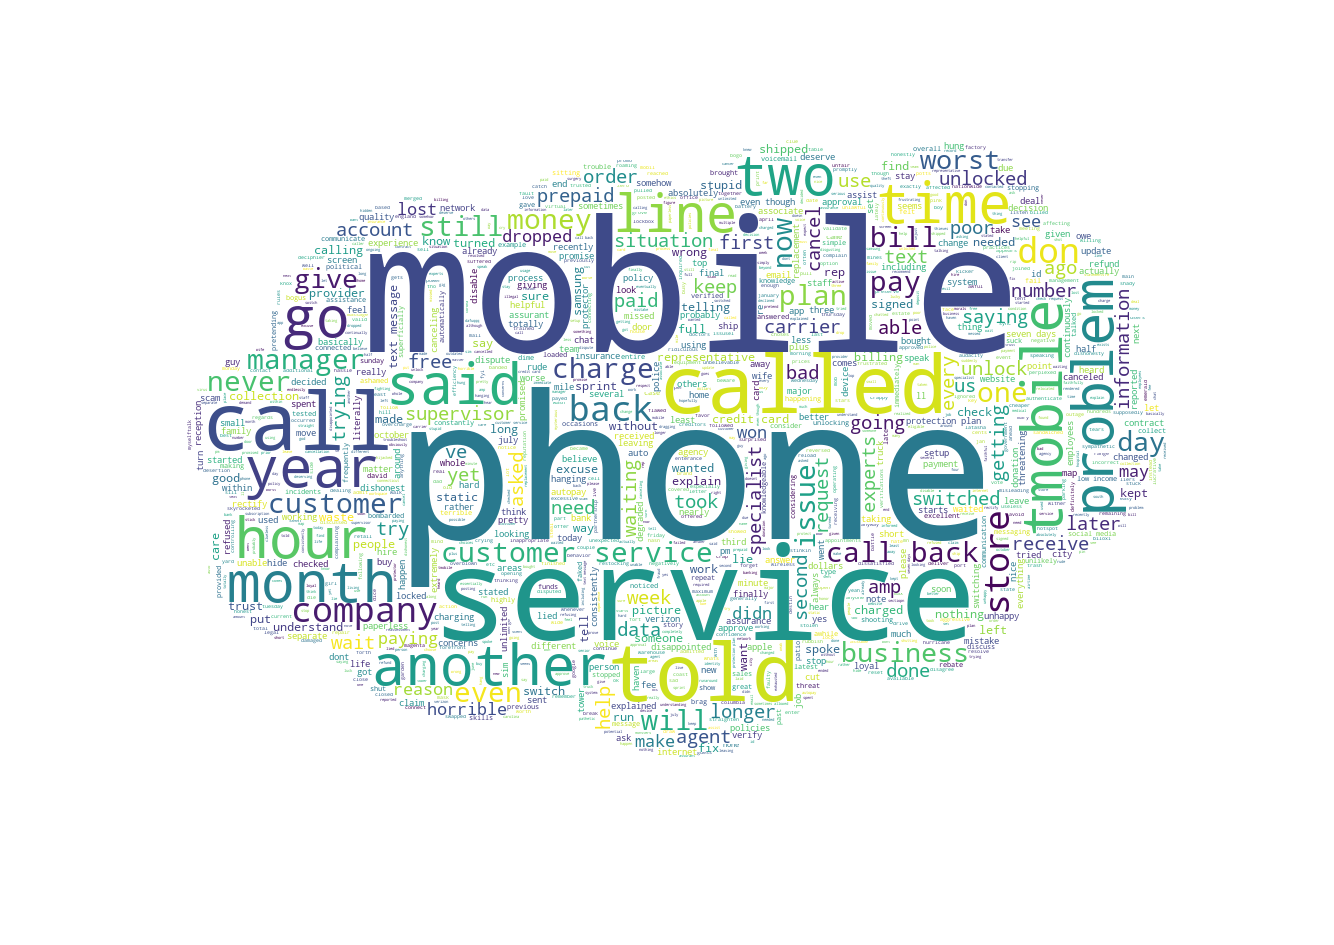

In [293]:
create_wordcloud(negative_values)

In [294]:
reviews

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,\n I have been with T Mobile fo...,i have been with t mobile for...,0.029318,0.471061,negative,0.047,0.910,0.043,-0.4995
1,\n Their coverage map is not en...,their coverage map is not ent...,0.122500,0.603333,positive,0.075,0.767,0.158,0.7184
2,\n I have used prepaid service ...,i have used prepaid service t...,0.032788,0.345578,negative,0.068,0.883,0.049,-0.6546
3,\n Don't believe the pink maps....,don t believe the pink maps ...,-0.069244,0.532746,negative,0.131,0.816,0.053,-0.9407
4,\n There free trial hotspot suc...,there free trial hotspot suck...,-0.072500,0.655000,positive,0.101,0.766,0.133,0.2023
...,...,...,...,...,...,...,...,...,...
75,"\n Always a great Experience, C...",always a great experience cu...,0.800000,0.750000,positive,0.000,0.594,0.406,0.6249
76,\n Tmobile one-plus is the best...,tmobile one plus is the best ...,0.433333,0.508333,positive,0.000,0.682,0.318,0.9022
77,\n Always get great cell signal...,always get great cell signal ...,0.900000,0.525000,positive,0.000,0.420,0.580,0.8519
78,\n better phone service than mo...,better phone service than mos...,0.200000,0.640000,positive,0.000,0.791,0.209,0.7003


In [295]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [296]:
clean = reviews

In [297]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

clean['Tweet_punct'] = reviews['text'].apply(lambda x: remove_punct(x))
clean.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct
0,\n I have been with T Mobile fo...,i have been with t mobile for...,0.029318,0.471061,negative,0.047,0.910,0.043,-0.4995,i have been with t mobile for...
1,\n Their coverage map is not en...,their coverage map is not ent...,0.122500,0.603333,positive,0.075,0.767,0.158,0.7184,their coverage map is not ent...
2,\n I have used prepaid service ...,i have used prepaid service t...,0.032788,0.345578,negative,0.068,0.883,0.049,-0.6546,i have used prepaid service t...
3,\n Don't believe the pink maps....,don t believe the pink maps ...,-0.069244,0.532746,negative,0.131,0.816,0.053,-0.9407,don t believe the pink maps ...
4,\n There free trial hotspot suc...,there free trial hotspot suck...,-0.072500,0.655000,positive,0.101,0.766,0.133,0.2023,there free trial hotspot suck...
5,\n I hate this company. Been wi...,i hate this company been wit...,0.010507,0.538768,negative,0.121,0.789,0.089,-0.7351,i hate this company been wit...
6,\n Love them! Customer service ...,love them customer service h...,0.218750,0.675000,positive,0.000,0.455,0.545,0.8955,love them customer service h...
7,\n They don’t have a wide range...,they don’t have a wide range ...,-0.083333,0.444444,negative,0.085,0.847,0.068,-0.1531,they don’t have a wide range ...
8,\n I use tmobile for a long tim...,i use tmobile for a long time...,-0.283333,0.533333,positive,0.132,0.733,0.135,0.0247,i use tmobile for a long time...
9,"\n Leah, the manager at T-Mobil...",leah the manager at t mobile...,0.340278,0.643056,positive,0.000,0.661,0.339,0.9954,leah the manager at t mobile...


In [298]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

clean['Tweet_tokenized'] = clean['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized
0,\n I have been with T Mobile fo...,i have been with t mobile for...,0.029318,0.471061,negative,0.047,0.910,0.043,-0.4995,i have been with t mobile for...,"[, i, have, been, with, t, mobile, for, over, ..."
1,\n Their coverage map is not en...,their coverage map is not ent...,0.122500,0.603333,positive,0.075,0.767,0.158,0.7184,their coverage map is not ent...,"[, their, coverage, map, is, not, entirely, co..."
2,\n I have used prepaid service ...,i have used prepaid service t...,0.032788,0.345578,negative,0.068,0.883,0.049,-0.6546,i have used prepaid service t...,"[, i, have, used, prepaid, service, through, t..."
3,\n Don't believe the pink maps....,don t believe the pink maps ...,-0.069244,0.532746,negative,0.131,0.816,0.053,-0.9407,don t believe the pink maps ...,"[, don, t, believe, the, pink, maps, we, bough..."
4,\n There free trial hotspot suc...,there free trial hotspot suck...,-0.072500,0.655000,positive,0.101,0.766,0.133,0.2023,there free trial hotspot suck...,"[, there, free, trial, hotspot, sucks, you, ge..."


In [299]:
stopword = nltk.corpus.stopwords.words('english')

In [300]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
clean['Tweet_nonstop'] = clean['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
clean.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,\n I have been with T Mobile fo...,i have been with t mobile for...,0.029318,0.471061,negative,0.047,0.910,0.043,-0.4995,i have been with t mobile for...,"[, i, have, been, with, t, mobile, for, over, ...","[, mobile, years, year, never, problem, two, i..."
1,\n Their coverage map is not en...,their coverage map is not ent...,0.122500,0.603333,positive,0.075,0.767,0.158,0.7184,their coverage map is not ent...,"[, their, coverage, map, is, not, entirely, co...","[, coverage, map, entirely, correct, supposed,..."
2,\n I have used prepaid service ...,i have used prepaid service t...,0.032788,0.345578,negative,0.068,0.883,0.049,-0.6546,i have used prepaid service t...,"[, i, have, used, prepaid, service, through, t...","[, used, prepaid, service, mobile, several, ye..."
3,\n Don't believe the pink maps....,don t believe the pink maps ...,-0.069244,0.532746,negative,0.131,0.816,0.053,-0.9407,don t believe the pink maps ...,"[, don, t, believe, the, pink, maps, we, bough...","[, believe, pink, maps, bought, brand, new, to..."
4,\n There free trial hotspot suc...,there free trial hotspot suck...,-0.072500,0.655000,positive,0.101,0.766,0.133,0.2023,there free trial hotspot suck...,"[, there, free, trial, hotspot, sucks, you, ge...","[, free, trial, hotspot, sucks, get, days, try..."
5,\n I hate this company. Been wi...,i hate this company been wit...,0.010507,0.538768,negative,0.121,0.789,0.089,-0.7351,i hate this company been wit...,"[, i, hate, this, company, been, with, them, f...","[, hate, company, years, consistently, got, wo..."
6,\n Love them! Customer service ...,love them customer service h...,0.218750,0.675000,positive,0.000,0.455,0.545,0.8955,love them customer service h...,"[, love, them, customer, service, has, always,...","[, love, customer, service, always, cheerful, ..."
7,\n They don’t have a wide range...,they don’t have a wide range ...,-0.083333,0.444444,negative,0.085,0.847,0.068,-0.1531,they don’t have a wide range ...,"[, they, don, t, have, a, wide, range, of, ser...","[, wide, range, service, areas, service, trash..."
8,\n I use tmobile for a long tim...,i use tmobile for a long time...,-0.283333,0.533333,positive,0.132,0.733,0.135,0.0247,i use tmobile for a long time...,"[, i, use, tmobile, for, a, long, time, but, i...","[, use, tmobile, long, time, change, carrier, ..."
9,"\n Leah, the manager at T-Mobil...",leah the manager at t mobile...,0.340278,0.643056,positive,0.000,0.661,0.339,0.9954,leah the manager at t mobile...,"[, leah, the, manager, at, t, mobile, store, w...","[, leah, manager, mobile, store, example, staf..."


In [301]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

clean['Tweet_stemmed'] = clean['Tweet_nonstop'].apply(lambda x: stemming(x))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,\n I have been with T Mobile fo...,i have been with t mobile for...,0.029318,0.471061,negative,0.047,0.910,0.043,-0.4995,i have been with t mobile for...,"[, i, have, been, with, t, mobile, for, over, ...","[, mobile, years, year, never, problem, two, i...","[, mobil, year, year, never, problem, two, inc..."
1,\n Their coverage map is not en...,their coverage map is not ent...,0.122500,0.603333,positive,0.075,0.767,0.158,0.7184,their coverage map is not ent...,"[, their, coverage, map, is, not, entirely, co...","[, coverage, map, entirely, correct, supposed,...","[, coverag, map, entir, correct, suppos, great..."
2,\n I have used prepaid service ...,i have used prepaid service t...,0.032788,0.345578,negative,0.068,0.883,0.049,-0.6546,i have used prepaid service t...,"[, i, have, used, prepaid, service, through, t...","[, used, prepaid, service, mobile, several, ye...","[, use, prepaid, servic, mobil, sever, year, c..."
3,\n Don't believe the pink maps....,don t believe the pink maps ...,-0.069244,0.532746,negative,0.131,0.816,0.053,-0.9407,don t believe the pink maps ...,"[, don, t, believe, the, pink, maps, we, bough...","[, believe, pink, maps, bought, brand, new, to...","[, believ, pink, map, bought, brand, new, top,..."
4,\n There free trial hotspot suc...,there free trial hotspot suck...,-0.072500,0.655000,positive,0.101,0.766,0.133,0.2023,there free trial hotspot suck...,"[, there, free, trial, hotspot, sucks, you, ge...","[, free, trial, hotspot, sucks, get, days, try...","[, free, trial, hotspot, suck, get, day, tri, ..."


In [302]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emreo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [303]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

clean['Tweet_lemmatized'] = clean['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,\n I have been with T Mobile fo...,i have been with t mobile for...,0.029318,0.471061,negative,0.047,0.910,0.043,-0.4995,i have been with t mobile for...,"[, i, have, been, with, t, mobile, for, over, ...","[, mobile, years, year, never, problem, two, i...","[, mobil, year, year, never, problem, two, inc...","[, mobile, year, year, never, problem, two, in..."
1,\n Their coverage map is not en...,their coverage map is not ent...,0.122500,0.603333,positive,0.075,0.767,0.158,0.7184,their coverage map is not ent...,"[, their, coverage, map, is, not, entirely, co...","[, coverage, map, entirely, correct, supposed,...","[, coverag, map, entir, correct, suppos, great...","[, coverage, map, entirely, correct, supposed,..."
2,\n I have used prepaid service ...,i have used prepaid service t...,0.032788,0.345578,negative,0.068,0.883,0.049,-0.6546,i have used prepaid service t...,"[, i, have, used, prepaid, service, through, t...","[, used, prepaid, service, mobile, several, ye...","[, use, prepaid, servic, mobil, sever, year, c...","[, used, prepaid, service, mobile, several, ye..."
3,\n Don't believe the pink maps....,don t believe the pink maps ...,-0.069244,0.532746,negative,0.131,0.816,0.053,-0.9407,don t believe the pink maps ...,"[, don, t, believe, the, pink, maps, we, bough...","[, believe, pink, maps, bought, brand, new, to...","[, believ, pink, map, bought, brand, new, top,...","[, believe, pink, map, bought, brand, new, top..."
4,\n There free trial hotspot suc...,there free trial hotspot suck...,-0.072500,0.655000,positive,0.101,0.766,0.133,0.2023,there free trial hotspot suck...,"[, there, free, trial, hotspot, sucks, you, ge...","[, free, trial, hotspot, sucks, get, days, try...","[, free, trial, hotspot, suck, get, day, tri, ...","[, free, trial, hotspot, suck, get, day, try, ..."


In [304]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [305]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(clean['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
print(countVectorizer.get_feature_names())

76 Number of reviews has 1076 words
['', 'abl', 'aboard', 'absolut', 'accomplish', 'account', 'across', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'admit', 'advertiseincreas', 'aervic', 'affect', 'afterthought', 'agenc', 'agent', 'aggress', 'ago', 'ahead', 'aid', 'air', 'airtim', 'allow', 'almost', 'along', 'alreadi', 'also', 'although', 'alway', 'amount', 'amp', 'android', 'annoy', 'anoth', 'answer', 'anyon', 'anyth', 'anyway', 'app', 'appar', 'appear', 'appl', 'appli', 'appoint', 'appreci', 'approv', 'april', 'area', 'around', 'arrang', 'arriv', 'asham', 'ashley', 'ask', 'assist', 'associ', 'assum', 'assur', 'att', 'audac', 'austin', 'authent', 'auto', 'automat', 'autopay', 'avail', 'averag', 'avoid', 'aw', 'away', 'awesom', 'awhil', 'back', 'bad', 'band', 'bank', 'base', 'basic', 'batteri', 'battl', 'becam', 'becasu', 'beganit', 'behavior', 'believ', 'bell', 'best', 'better', 'bewar', 'beyond', 'bi', 'bill', 'billtmobil', 'biloxi', 'bit', 'bless', 'bogo', 'bogu', 'bombard', 

In [306]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abl,aboard,absolut,accomplish,account,across,action,activ,actual,...,wth,x,yard,ye,yeah,year,yesterday,yet,youtub,zero
0,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,0,3,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,2,1,0,0,0,2,0,0,0,1,...,0,0,0,0,0,2,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
count = pd.DataFrame(count_vect_df.sum())

In [308]:
count.sort_values(0,ascending=False).head(20)

,0
,152
servic,101
call,99
phone,96
mobil,88
custom,71
get,63
would,37
go,37
tmobil,37


In [309]:
reviews['text_len'] = reviews['text'].astype(str).apply(len)
reviews['text_word_count'] = reviews['text'].apply(lambda x: len(str(x).split()))
reviews.mean()

polarity             0.046127
subjectivity         0.551283
neg                  0.102711
neu                  0.740211
pos                  0.156987
compound             0.034599
text_len           662.921053
text_word_count    119.026316
dtype: float64

In [310]:
round(pd.DataFrame(reviews.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,156.26
positive,87.24


In [311]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [312]:
review_negative = reviews[reviews["sentiment"]=="negative"]
review_positive = reviews[reviews["sentiment"]=="positive"]

n2_bigrams_negative = get_top_n_gram(review_negative['text'],(2,2),20)
n2_bigrams_positive = get_top_n_gram(review_positive['text'],(2,2),20)

n3_bigrams_negative = get_top_n_gram(review_negative['text'],(3,3),20)
n3_bigrams_positive = get_top_n_gram(review_positive['text'],(3,3),20)

In [313]:
n2_bigrams_negative

[('customer service', 15),
 ('unlock phone', 4),
 ('phone number', 4),
 ('protection plan', 4),
 ('credit card', 4),
 ('called told', 3),
 ('wait hours', 3),
 ('months later', 3),
 ('data plan', 3),
 ('months ago', 3),
 ('mobile store', 3),
 ('called cancel', 3),
 ('manager hours', 3),
 ('order shipped', 3),
 ('switched mobile', 3),
 ('seven days', 3),
 ('mobile years', 2),
 ('phones called', 2),
 ('told wait', 2),
 ('phone company', 2)]

In [314]:
n3_bigrams_negative

[('phones called told', 2),
 ('called told wait', 2),
 ('told wait hours', 2),
 ('customer service experts', 2),
 ('poor customer service', 2),
 ('loyal customer years', 2),
 ('protection plan phones', 2),
 ('credit card company', 2),
 ('recently switched mobile', 2),
 ('unlimited data plan', 2),
 ('worst service carrier', 2),
 ('mobile years year', 1),
 ('years year problem', 1),
 ('year problem incidents', 1),
 ('problem incidents past', 1),
 ('incidents past months', 1),
 ('past months customer', 1),
 ('months customer service', 1),
 ('customer service terrible', 1),
 ('service terrible situation', 1)]